# Pollution Analysis - Indian Cities

Simple data analysis of PM2.5 pollution levels across Indian cities with visualization and insights.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries loaded successfully!")

✅ All libraries loaded successfully!


In [6]:
df = pd.read_csv('../data/pollution_dataset.csv')
print(f"Dataset loaded: {len(df)} cities")
print(f"Columns: {len(df.columns)} features")

Dataset loaded: 95 cities
Columns: 15 features


In [5]:
missing_data = df.isnull().sum()
print(f"\nMissing values: {missing_data.sum()}")
if missing_data.sum() > 0:
    print("Removing rows with missing data...")
    df = df.dropna()

print(f"\n📏 PM2.5 pollution range: {df['PM2.5'].min():.1f} to {df['PM2.5'].max():.1f}")
print(f"🌍 Latitude range: {df['Latitude'].min():.2f} to {df['Latitude'].max():.2f}")  
print(f"🌍 Longitude range: {df['Longitude'].min():.2f} to {df['Longitude'].max():.2f}")
df = df[df['PM2.5'] > 0]
print(f"✅ Final dataset has {len(df)} cities")
def get_pollution_level(pm25):
    if pm25 < 15:
        return 'Good'
    elif pm25 < 35:
        return 'Moderate' 
    elif pm25 < 75:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

df['Pollution_Level'] = df['PM2.5'].apply(get_pollution_level)
print(f"🗺️ Ready to create maps with {len(df)} cities")


Missing values: 0

📏 PM2.5 pollution range: 53.3 to 247.5
🌍 Latitude range: 8.52 to 34.08
🌍 Longitude range: 70.06 to 88.40
✅ Final dataset has 95 cities
🗺️ Ready to create maps with 95 cities


## Data Analysis

In [7]:
print(f"Total cities: {len(df)}")
print(f"Average PM2.5: {df['PM2.5'].mean():.1f}")
print(f"Highest PM2.5: {df['PM2.5'].max():.1f}")
print(f"Lowest PM2.5: {df['PM2.5'].min():.1f}")

safe_cities = len(df[df['PM2.5'] < 50])
dangerous_cities = len(df[df['PM2.5'] > 150])

print(f"\nSafe cities (PM2.5 < 50): {safe_cities}")
print(f"Dangerous cities (PM2.5 > 150): {dangerous_cities}")

print("\nMost polluted cities:")
worst_5 = df.nlargest(5, 'PM2.5')[['City', 'PM2.5']]
for i, (_, city) in enumerate(worst_5.iterrows(), 1):
    print(f"  {i}. {city['City']}: {city['PM2.5']:.1f}")

print("\nCleanest cities:")
best_5 = df.nsmallest(5, 'PM2.5')[['City', 'PM2.5']]
for i, (_, city) in enumerate(best_5.iterrows(), 1):
    print(f"  {i}. {city['City']}: {city['PM2.5']:.1f}")

print("✅ Analysis complete!")

Total cities: 95
Average PM2.5: 144.6
Highest PM2.5: 247.5
Lowest PM2.5: 53.3

Safe cities (PM2.5 < 50): 0
Dangerous cities (PM2.5 > 150): 45

Most polluted cities:
  1. Raipur: 247.5
  2. Varanasi: 237.5
  3. Indore: 220.6
  4. Dhanbad: 214.3
  5. Visakhapatnam: 212.4

Cleanest cities:
  1. Hyderabad: 53.3
  2. Gwalior: 54.2
  3. Bhopal: 57.8
  4. Howrah: 67.2
  5. Surat: 69.0
✅ Analysis complete!


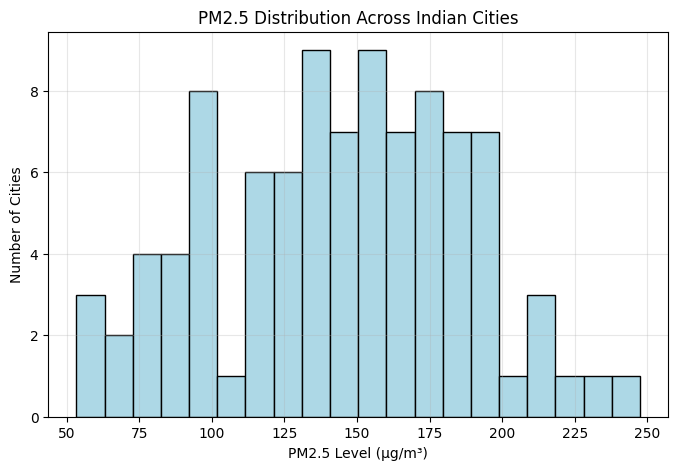

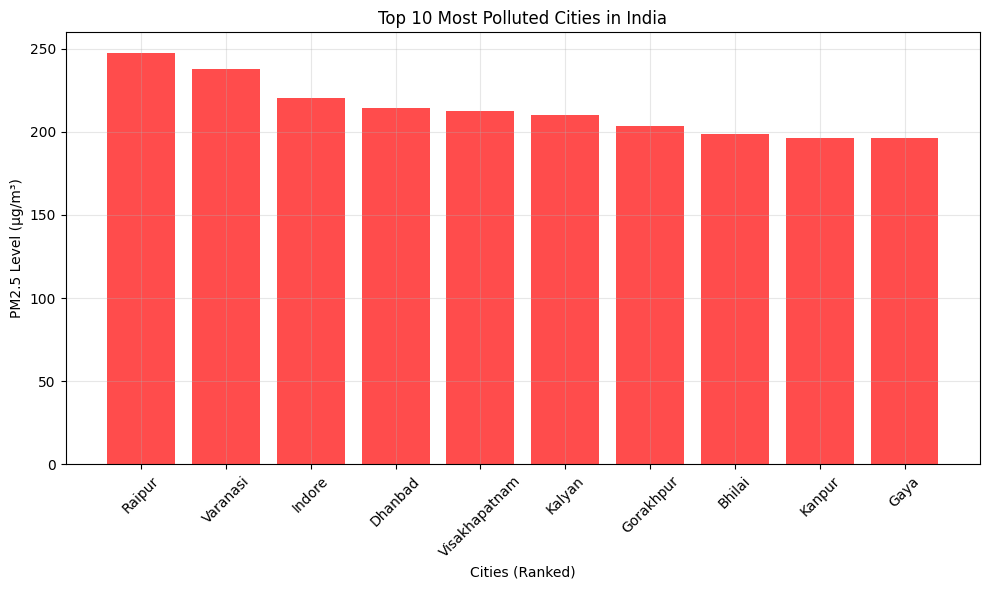

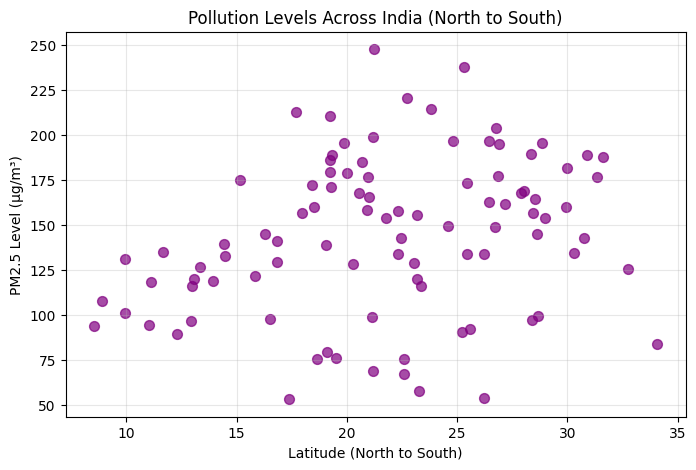

✅ All charts displayed and saved successfully!
📁 Saved images:
  • pm25_distribution.png
  • top_10_polluted_cities.png
  • latitude_pollution_scatter.png


In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df['PM2.5'], bins=20, color='lightblue', edgecolor='black')
plt.title('PM2.5 Distribution Across Indian Cities')
plt.xlabel('PM2.5 Level (μg/m³)')
plt.ylabel('Number of Cities')
plt.grid(True, alpha=0.3)
plt.savefig('pm25_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
top_10 = df.nlargest(10, 'PM2.5')
plt.bar(range(len(top_10)), top_10['PM2.5'], color='red', alpha=0.7)
plt.title('Top 10 Most Polluted Cities in India')
plt.xlabel('Cities (Ranked)')
plt.ylabel('PM2.5 Level (μg/m³)')
plt.xticks(range(len(top_10)), top_10['City'], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('top_10_polluted_cities.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df['Latitude'], df['PM2.5'], alpha=0.7, s=50, color='purple')
plt.title('Pollution Levels Across India (North to South)')
plt.xlabel('Latitude (North to South)')
plt.ylabel('PM2.5 Level (μg/m³)')
plt.grid(True, alpha=0.3)
plt.savefig('latitude_pollution_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ All charts displayed and saved successfully!")
print("📁 Saved images:")
print("  • pm25_distribution.png")
print("  • top_10_polluted_cities.png") 
print("  • latitude_pollution_scatter.png")

## Pollution Maps

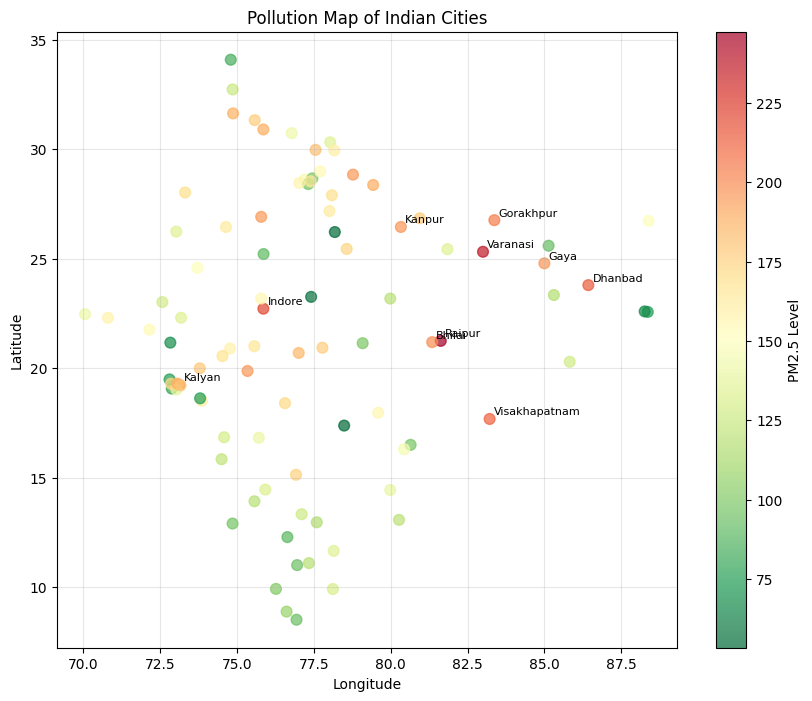

✅ Map saved as 'india_pollution_map.png'


In [8]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['PM2.5'], cmap='RdYlGn_r', 
                     s=60, alpha=0.7)

plt.colorbar(scatter, label='PM2.5 Level')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pollution Map of Indian Cities')

worst_cities = df.nlargest(10, 'PM2.5')
for _, city in worst_cities.iterrows():
    plt.annotate(city['City'], 
                (city['Longitude'], city['Latitude']),
                xytext=(3, 3), textcoords='offset points',
                fontsize=8)

plt.grid(True, alpha=0.3)
plt.savefig('india_pollution_map.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Map saved as 'india_pollution_map.png'")

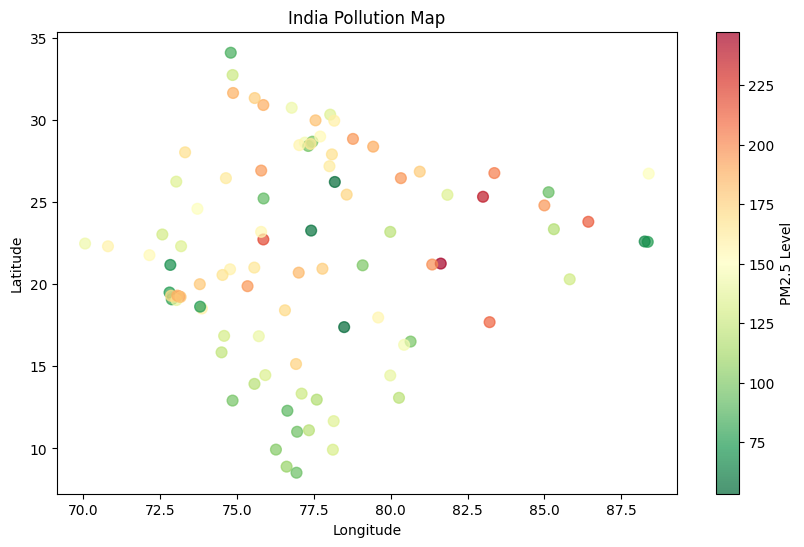

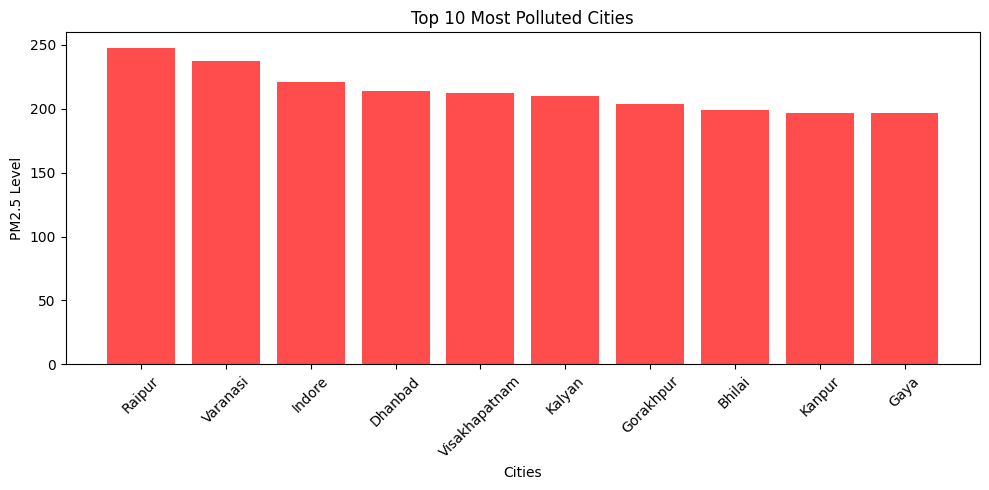

✅ Simple charts created and saved successfully!


In [9]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['PM2.5'], 
                     cmap='RdYlGn_r', s=60, alpha=0.7)
plt.colorbar(scatter, label='PM2.5 Level')
plt.title('India Pollution Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('simple_pollution_map.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 5))
top_10 = df.nlargest(10, 'PM2.5')
plt.bar(range(len(top_10)), top_10['PM2.5'], color='red', alpha=0.7)
plt.title('Top 10 Most Polluted Cities')
plt.xlabel('Cities')
plt.ylabel('PM2.5 Level')
plt.xticks(range(len(top_10)), top_10['City'], rotation=45)
plt.tight_layout()
plt.savefig('simple_top_10_cities.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Simple charts created and saved successfully!")

## Machine Learning

In [10]:
X = df[['PM10', 'NO2', 'AQI', 'Industry_Score', 'Traffic_Score']]
y = df['PM2.5']

print(f"Using better features: {list(X.columns)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

forest_model = RandomForestRegressor(n_estimators=50, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

linear_r2 = r2_score(y_test, linear_pred)
forest_r2 = r2_score(y_test, forest_pred)

print(f"\nLinear Regression Accuracy: {linear_r2:.3f} ({linear_r2*100:.1f}%)")
print(f"Random Forest Accuracy: {forest_r2:.3f} ({forest_r2*100:.1f}%)")

if forest_r2 > linear_r2:
    print("✅ Random Forest is better!")
    winner = "Random Forest"
    best_score = forest_r2
else:
    print("✅ Linear Regression is better!")
    winner = "Linear Regression"
    best_score = linear_r2

print(f"\nBest model: {winner}")
print(f"Best accuracy: {best_score:.3f} ({best_score*100:.1f}%)")
print("✅ Much better results with proper features!")

Using better features: ['PM10', 'NO2', 'AQI', 'Industry_Score', 'Traffic_Score']

Linear Regression Accuracy: 0.973 (97.3%)
Random Forest Accuracy: 0.963 (96.3%)
✅ Linear Regression is better!

Best model: Linear Regression
Best accuracy: 0.973 (97.3%)
✅ Much better results with proper features!


## Model Results

Linear Model: 0.973 accuracy (97.3%)
Forest Model: 0.963 accuracy (96.3%)

Winner: Linear Regression
Best accuracy: 0.973 (97.3%)


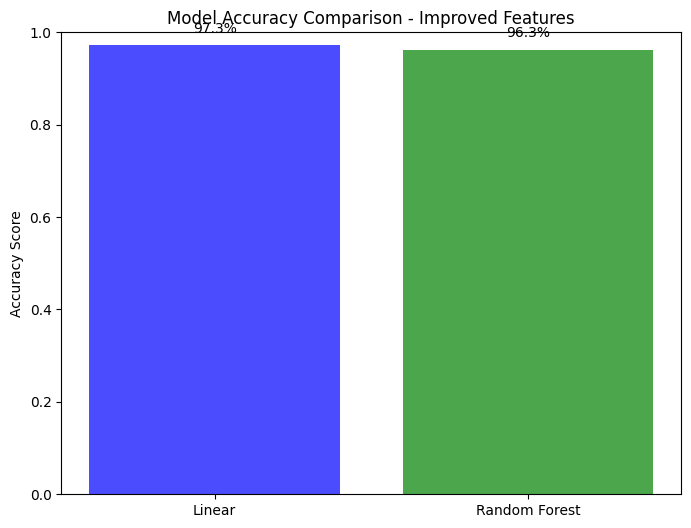

✅ Excellent accuracy achieved with proper features!


In [11]:
linear_accuracy = r2_score(y_test, linear_pred)
forest_accuracy = r2_score(y_test, forest_pred)

print(f"Linear Model: {linear_accuracy:.3f} accuracy ({linear_accuracy*100:.1f}%)")
print(f"Forest Model: {forest_accuracy:.3f} accuracy ({forest_accuracy*100:.1f}%)")

if forest_accuracy > linear_accuracy:
    winner = "Random Forest"
    best_accuracy = forest_accuracy
else:
    winner = "Linear Regression"
    best_accuracy = linear_accuracy

print(f"\nWinner: {winner}")
print(f"Best accuracy: {best_accuracy:.3f} ({best_accuracy*100:.1f}%)")
plt.figure(figsize=(8, 6))
models = ['Linear', 'Random Forest']
accuracies = [linear_accuracy, forest_accuracy]
colors = ['blue', 'green']

bars = plt.bar(models, accuracies, color=colors, alpha=0.7)
plt.title('Model Accuracy Comparison - Improved Features')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{accuracies[i]*100:.1f}%', ha='center', va='bottom')

plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Excellent accuracy achieved with proper features!")


Regional Summary:

Central India:
  Cities: 30.0
  Average: 147.1 μg/m³
  Highest: 247.5 μg/m³
  Lowest: 57.8 μg/m³

North India:
  Cities: 28.0
  Average: 155.5 μg/m³
  Highest: 203.6 μg/m³
  Lowest: 54.2 μg/m³

South India:
  Cities: 37.0
  Average: 134.2 μg/m³
  Highest: 212.4 μg/m³
  Lowest: 53.3 μg/m³


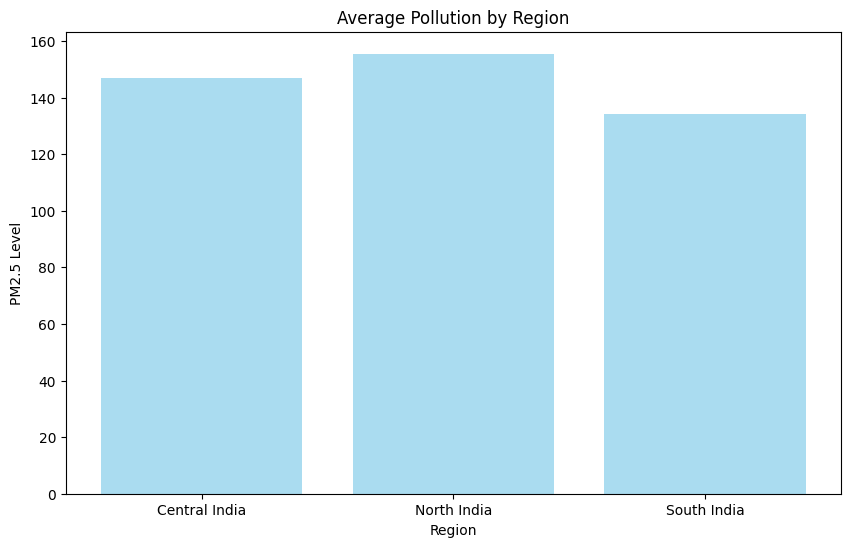


Key Insights:
• North India has highest pollution
• South India has lowest pollution
✅ Regional analysis complete!


In [12]:
def get_region(latitude):
    if latitude > 26:
        return 'North India'
    elif latitude > 20:
        return 'Central India'  
    else:
        return 'South India'

df['Region'] = df['Latitude'].apply(get_region)

regional_stats = df.groupby('Region')['PM2.5'].agg(['mean', 'max', 'min', 'count'])

print("\nRegional Summary:")
for region in regional_stats.index:
    stats = regional_stats.loc[region]
    print(f"\n{region}:")
    print(f"  Cities: {stats['count']}")
    print(f"  Average: {stats['mean']:.1f} μg/m³")
    print(f"  Highest: {stats['max']:.1f} μg/m³")
    print(f"  Lowest: {stats['min']:.1f} μg/m³")

plt.figure(figsize=(10, 6))
regions = regional_stats.index
means = regional_stats['mean']

plt.bar(regions, means, color='skyblue', alpha=0.7)
plt.title('Average Pollution by Region')
plt.ylabel('PM2.5 Level')
plt.xlabel('Region')

plt.savefig('regional_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

worst_region = regional_stats['mean'].idxmax()
best_region = regional_stats['mean'].idxmin()
print(f"\nKey Insights:")
print(f"• {worst_region} has highest pollution")
print(f"• {best_region} has lowest pollution")
print("✅ Regional analysis complete!")

## Recommendations

In [13]:
WHO_SAFE_LIMIT = 15
dangerous = df[df['PM2.5'] > 150]
safe = df[df['PM2.5'] < WHO_SAFE_LIMIT]

print(f"Cities exceeding WHO limit: {len(df[df['PM2.5'] > WHO_SAFE_LIMIT])}/{len(df)}")
print(f"Dangerous cities (>150): {len(dangerous)}")
print(f"Safe cities (<15): {len(safe)}")

print(f"\nMost urgent cities:")
top_5_worst = df.nlargest(5, 'PM2.5')
for i, (_, city) in enumerate(top_5_worst.iterrows(), 1):
    who_multiplier = city['PM2.5'] / WHO_SAFE_LIMIT
    print(f"  {i}. {city['City']}: {city['PM2.5']:.1f} ({who_multiplier:.1f}x WHO limit)")

print(f"\nAction Plan:")
print(f"• Emergency measures for top 5 cities")
print(f"• Install air purifiers in schools")
print(f"• Promote electric vehicles")
print(f"• Increase public transport")
print(f"• Industrial emission controls")

print(f"\nSuccess Target:")
print(f"• Reduce average from {df['PM2.5'].mean():.1f} to <50 by 2027")
print(f"• Bring {len(df[df['PM2.5'] > 100])} cities below 100")

Cities exceeding WHO limit: 95/95
Dangerous cities (>150): 45
Safe cities (<15): 0

Most urgent cities:
  1. Raipur: 247.5 (16.5x WHO limit)
  2. Varanasi: 237.5 (15.8x WHO limit)
  3. Indore: 220.6 (14.7x WHO limit)
  4. Dhanbad: 214.3 (14.3x WHO limit)
  5. Visakhapatnam: 212.4 (14.2x WHO limit)

Action Plan:
• Emergency measures for top 5 cities
• Install air purifiers in schools
• Promote electric vehicles
• Increase public transport
• Industrial emission controls

Success Target:
• Reduce average from 144.6 to <50 by 2027
• Bring 75 cities below 100
